In [7]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')

import simgio_utils as su
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [8]:
n_tasks = 15
n_executions = 200
nh_max = 11


t_begin = 6000
t_end = 14000


heuristics = [
    "FairShare",
    "Exclusive-FCFS",
    "Set-10",
    "Set-FairShare",
    "Sharing+Priority"
]


df_all, ev = su.load_all(priorities=heuristics, n_tasks=n_tasks, n_executions=n_executions, csv_folder="csv/")
df_all = su.compute_metrics(df_all,t_begin, t_end)

df_fairshare = ev.loc[ev.priority == "FairShare"]
df_exclusive = ev.loc[ev.priority == "Exclusive-FCFS"]
df_set10 = ev.loc[ev.priority == "Set-10"]


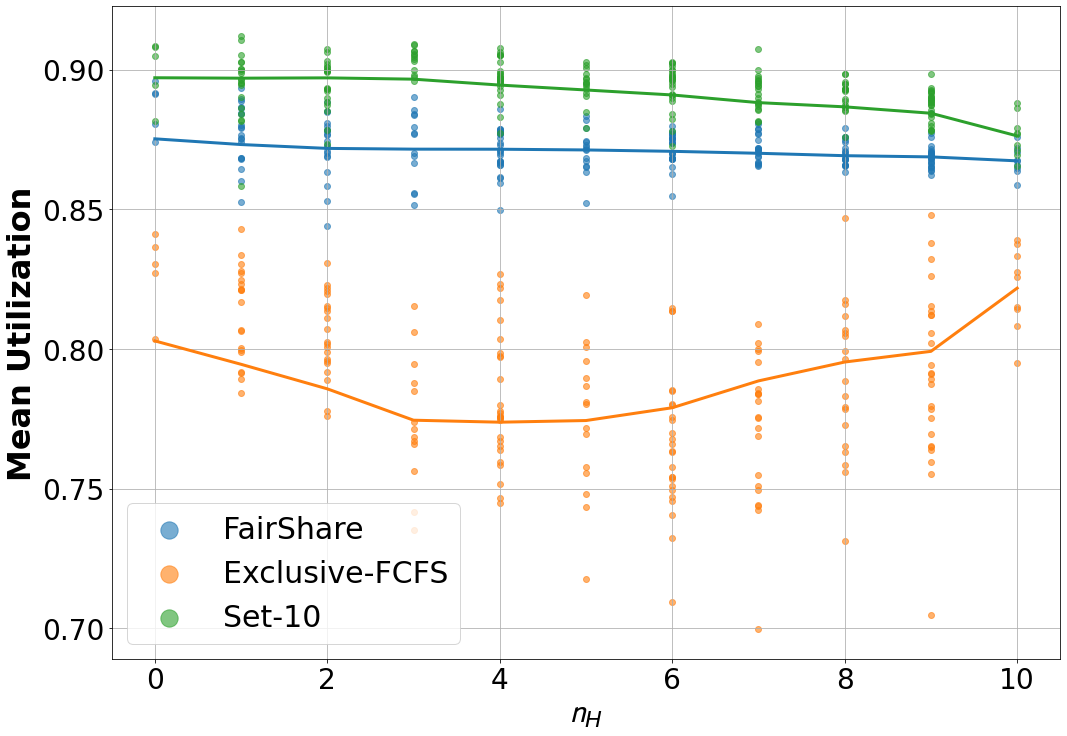

In [9]:
su.plot_scatter_utilization({"FairShare": df_fairshare,
                            "Exclusive-FCFS": df_exclusive,
                             "Set-10": df_set10},
                            x_plot=[i for i in range(0, nh_max)],
                            granularity=3.5,
                            figsize=(17, 12))

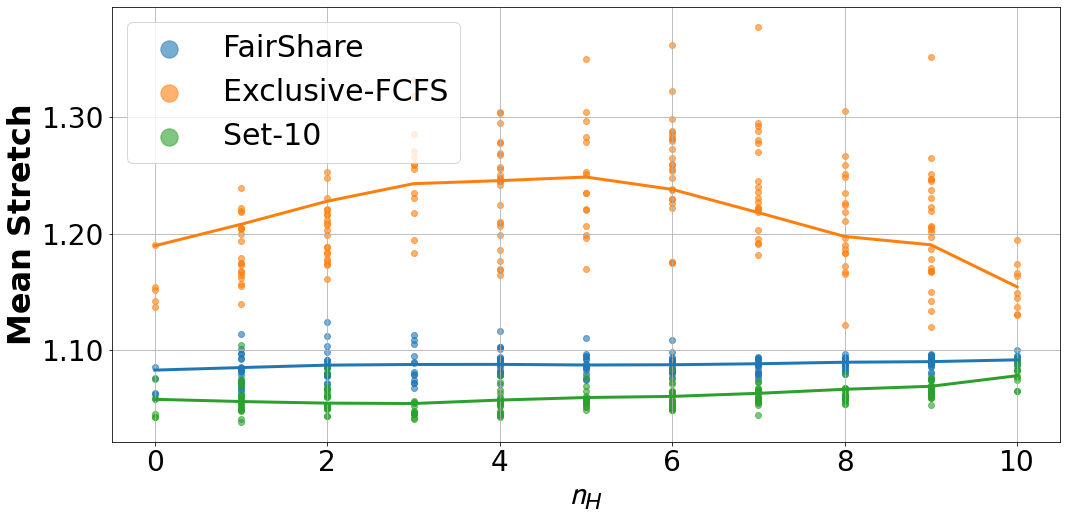

In [10]:
su.plot_scatter_stretch_gmean({
    "FairShare": df_all.loc[df_all.priority == "FairShare"],
    "Exclusive-FCFS": df_all.loc[df_all.priority == "Exclusive-FCFS"],
    "Set-10": df_all.loc[df_all.priority == "Set-10"],
},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

In [11]:
su.plot_scatter_stretch_max({
    "FairShare": ev.loc[ev.priority == "FairShare"],
    "Exclusive-FCFS": ev.loc[ev.priority == "Exclusive-FCFS"],
    "Set-10": ev.loc[ev.priority == "Set-10"],
},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

AttributeError: module 'simgio_utils' has no attribute 'plot_scatter_stretch_max'

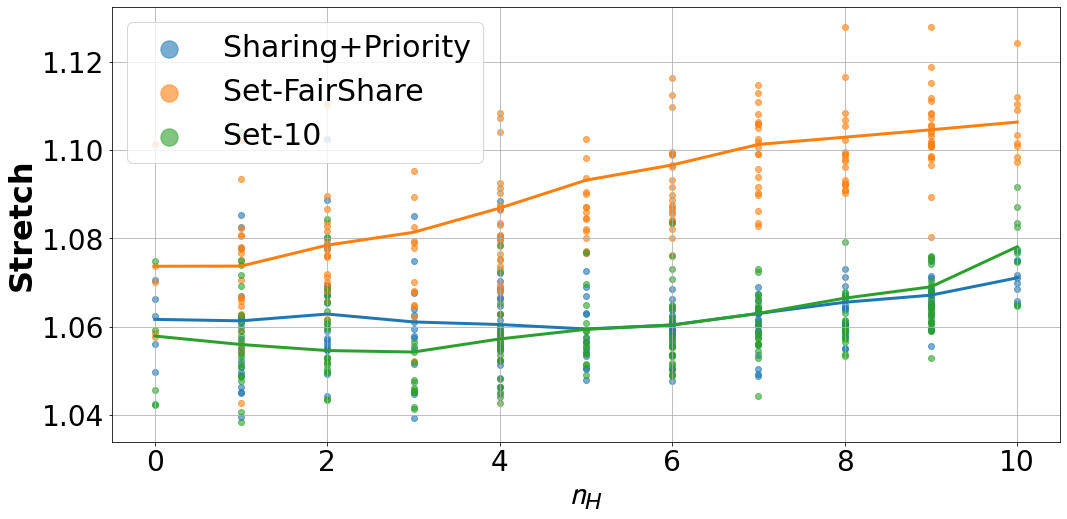

In [ ]:
su.plot_scatter_stretch_gmean({
    "Sharing+Priority": df_all.loc[df_all.priority == "Sharing+Priority"],
    "Set-FairShare": df_all.loc[df_all.priority == "Set-FairShare"],
    "Set-10": df_all.loc[df_all.priority == "Set-10"]},
    
x_plot=[i for i in range(0, nh_max)],
granularity=2)

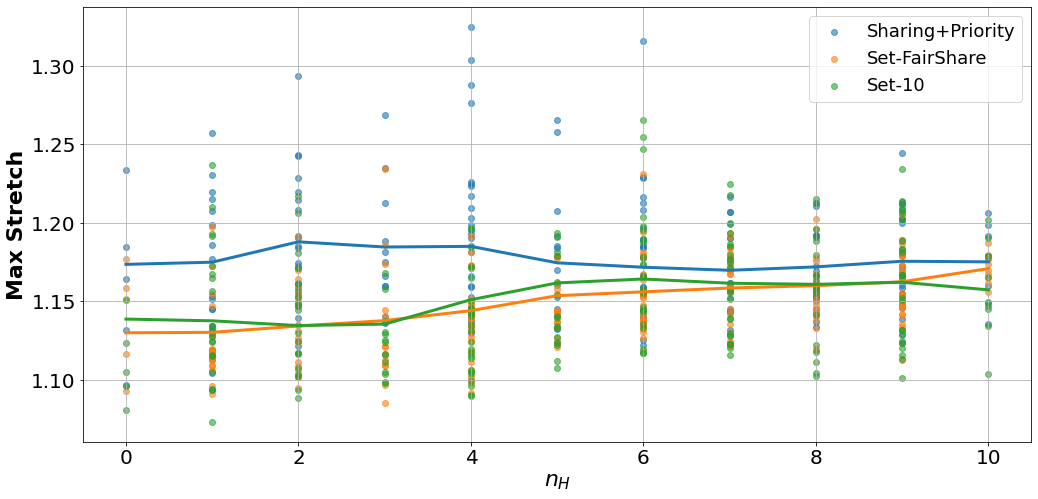

In [ ]:
su.plot_scatter_stretch_max({
    "Sharing+Priority": ev.loc[ev.priority == "Sharing+Priority"],
    "Set-FairShare": ev.loc[ev.priority == "Set-FairShare"],
    "Set-10": ev.loc[ev.priority == "Set-10"]},
    
x_plot=[i for i in range(0, nh_max)],
granularity=2)

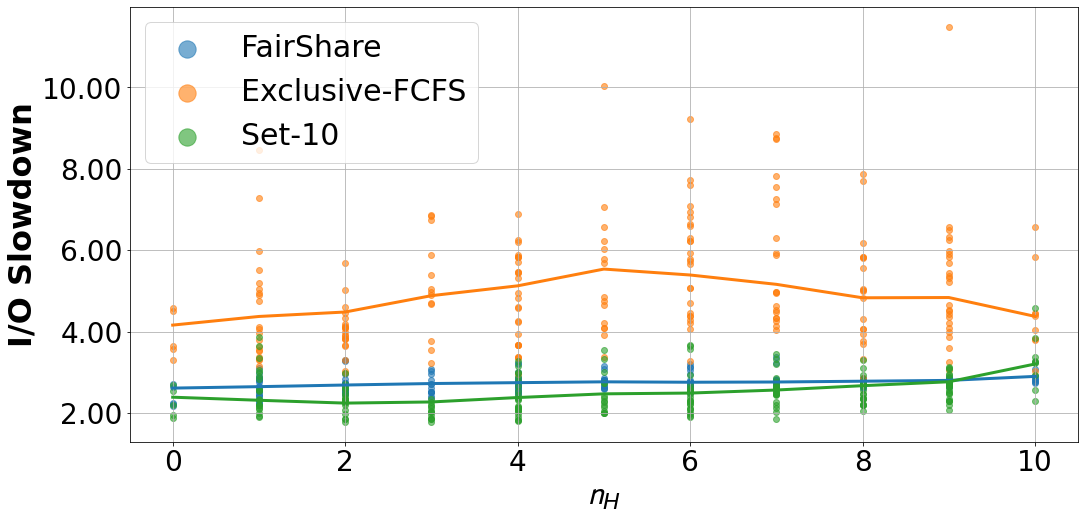

In [ ]:
su.plot_scatter_io_slowdown_gmean({
    "FairShare": df_all.loc[df_all.priority == "FairShare"],
    "Exclusive-FCFS": df_all.loc[df_all.priority == "Exclusive-FCFS"],
    "Set-10": df_all.loc[df_all.priority == "Set-10"],
},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

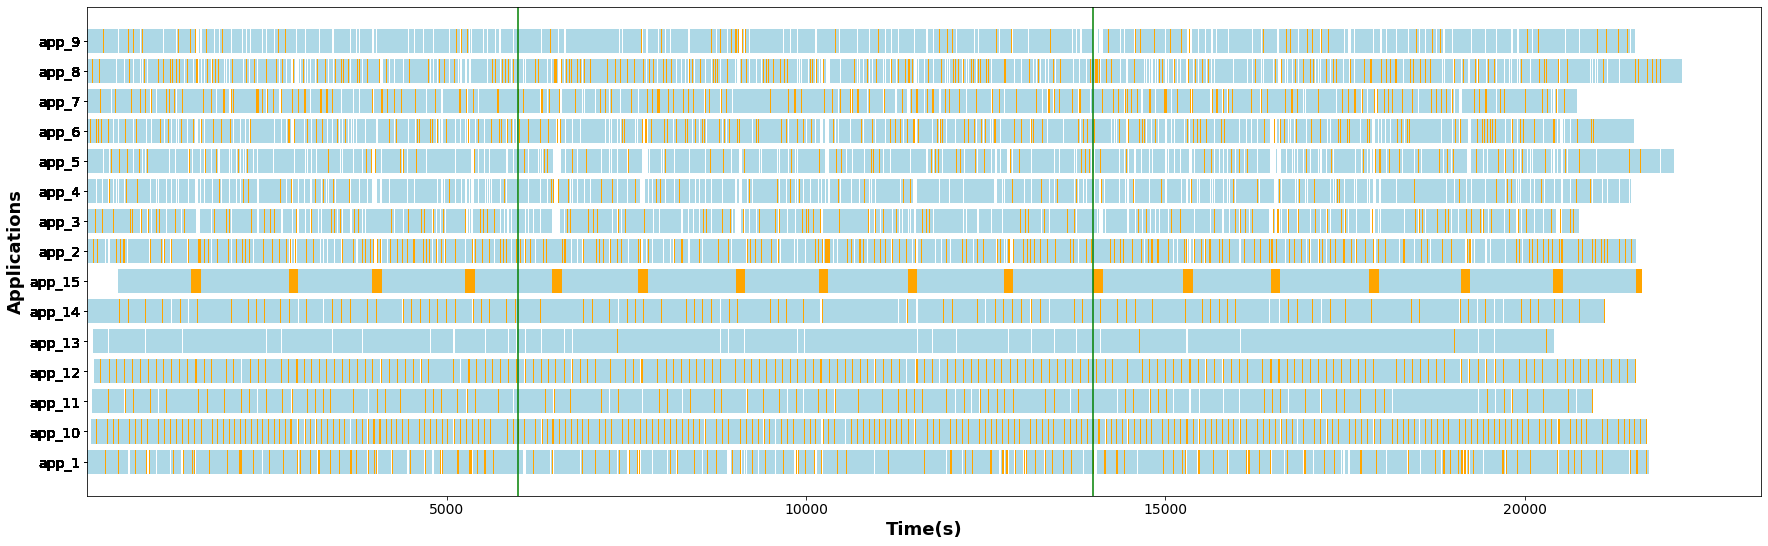

In [13]:
su.execution_graph(su.load_phases("csv/phase_Set-FairShare_100.csv"),6000, 14000, figsize=(30, 9), save_to="example.pdf")

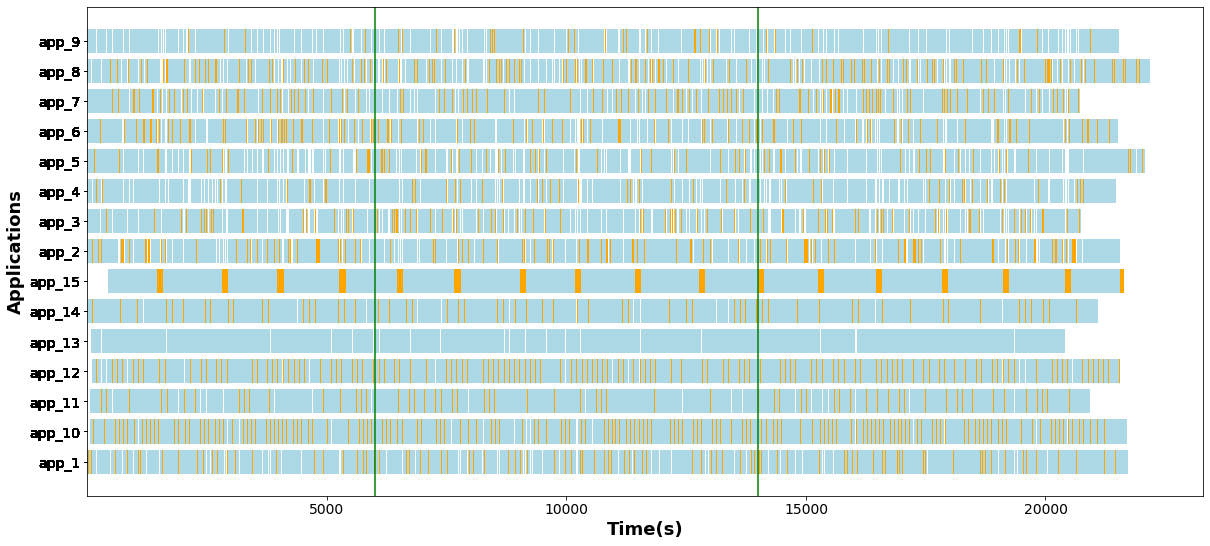

In [14]:
su.execution_graph(su.load_phases("csv/phase_Set-FairShare_100.csv"), 6000, 14000, figsize=(20, 9), save_to="example.pdf")